# Luxury Hotel Sentiment Analysis

In [1]:
# nltk is one of the most useful libraries when it comes to nlp
!pip install nltk

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

from wordcloud import WordCloud, STOPWORDS
from spacytextblob.spacytextblob import SpacyTextBlob

2022-12-12 23:52:26.023018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# the data file is located in the folder named 'clean_data' and the file name is 'master_table.csv'

path = '/Users/aurorapeng/Documents/GitHub/Luxury-hotel-sentiment-analysis/Data/clean_data/master_table.csv'
data = pd.read_csv(path)

In [4]:
def get_columns(df):
    data_rating = df[['review_date','hotel_name','rating']]
    year = []
    for index, content in data_rating.iterrows():
        lasttwo = content['review_date'][-4:]
        year.append(lasttwo)

    data_rating['year'] = year 
    return data_rating

In [5]:
def get_mean_rating(df):
    data_rating_mean = data_rating.groupby(['hotel_name','year'])['rating'].mean() # group by time as well 
    data_rating_mean = data_rating_mean.to_frame()
    data_rating_mean = data_rating_mean.reset_index()
    data_rating_mean = data_rating_mean.drop(index=[12,13,14,15,16,17,18,31,32,33,44])
    return data_rating_mean

In [6]:
data_rating = get_columns(data)
data_rating_mean = get_mean_rating(data_rating)

/var/folders/6w/6xy2kbxd18qbdk45rsrvm8w40000gn/T/ipykernel_13779/543352964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rating['year'] = year


## The first static plot : Average Hotel Ratings Over The Years

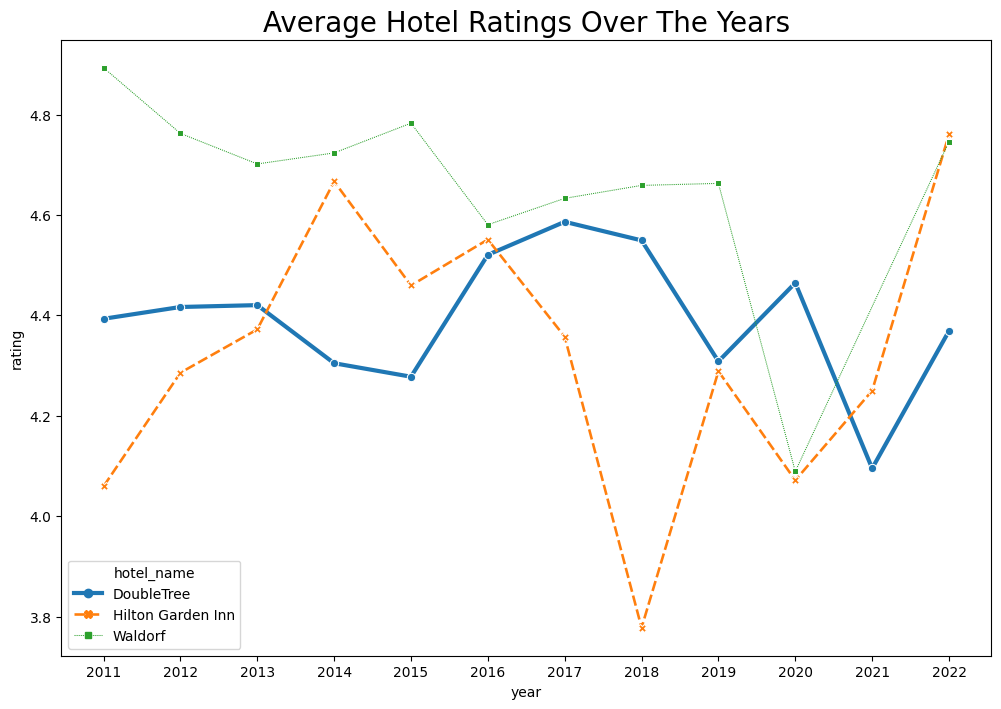

In [7]:
def mean_rating_plot(df):
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.lineplot(x = 'year', y = 'rating', hue = 'hotel_name', data = df, legend=True,
                     style = 'hotel_name', markers = True,size = 'hotel_name')
    ax.set_title('Average Hotel Ratings Over The Years',fontsize=20)
    plt.savefig('Average_Hotel_Ratings_Over_The_Years.png')
mean_rating_plot(data_rating_mean)

Hilton Garden Inn and Waldorf both experienced a drop from 2019 to 2020. However, Double Tree still remained its ratings. It seems like that during the pandemic the hotel services might experience a drop because of manpower shortage, management issues, etc.

We can see that at the very first begining, the average hotel rating is basically conformed with their positioning, i.e. the first tier hotels has relatively highest rating, the second tier hotel has relatively medium ratings, and the third tier hotel has relatively lowest rating. But there is an interesting thing here that during pandemic, i.e.2020, the second tier hotel has increased their rating unexpectedly, while the rest of the two tiers hotels has dropped. The best guess we had in here is the mid-tier hotel's target customers are those for business trip. Therefore during the pandemic era, the luxurious hotles and the common hotel's customers decreased, but the mid-tier hotel customers will normally enjoy more service in the hotel.

## The second static plot: Most Common Hotel Ratings Over The Years

In [8]:
def get_mode_rating(df):
    data_rating_mode = df.groupby(['hotel_name','year'])['rating'].agg(pd.Series.mode) # group by time as well 
    data_rating_mode = data_rating_mode.to_frame()
    data_rating_mode = data_rating_mode.reset_index()
    data_rating_mode = data_rating_mode.drop(index=[12,13,14,15,16,17,18,31,44])
    return data_rating_mode
data_rating_mode = get_mode_rating(data_rating)

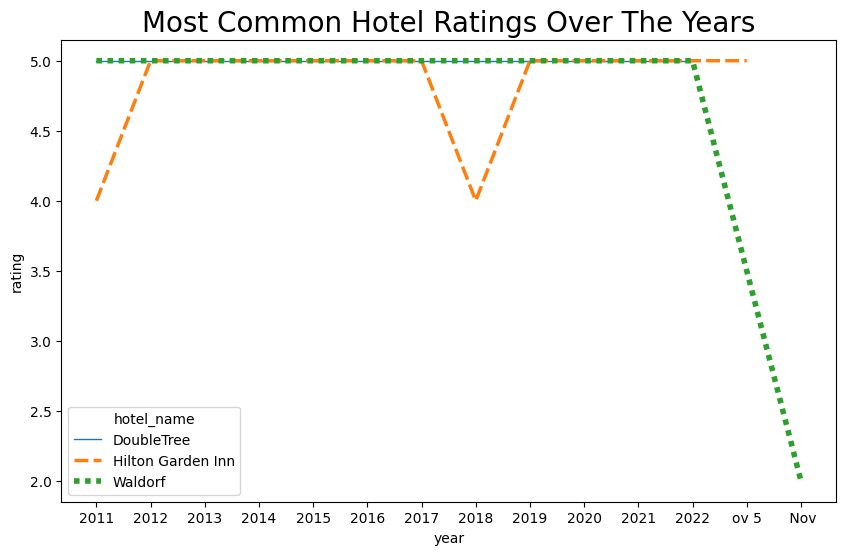

In [9]:
def mode_rating_plot(df):
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.lineplot(x = 'year', y = 'rating', hue = 'hotel_name', data = df, legend=True,
                     style = 'hotel_name',size = 'hotel_name',sizes=(4, 1))
    ax.set_title('Most Common Hotel Ratings Over The Years',fontsize=20)
    plt.savefig('Most_Common_Hotel_Ratings_Over_The_Years.png')

mode_rating_plot(data_rating_mode)

The mode of hotel ratings almost remained at 5 for Double Tree, even during the pandemic, indicating that Double Tree provides good customer experiences. As for Hilton Garden Inn and Waldorf, Hilton Garden Inn has a drop in 2018 but went back later on, and Waldorf had a drop in 2022 probably because we only have 10 months’ data in 2022 when we began the project. It seems like the pandemic does not have much impact on the mode of customer ratings. 

## The third static plot: Minimum Hotel Ratings Over The Years

In [10]:
def get_min_rating(df):

    data_rating_min = df.groupby(['hotel_name','year'])['rating'].min() # group by time as well 
    data_rating_min = data_rating_min.to_frame()
    data_rating_min = data_rating_min.reset_index()
    data_rating_min = data_rating_min.drop(index=[12,13,14,15,16,17,18,31,44])
    return data_rating_min
data_rating_min = get_min_rating(data_rating)

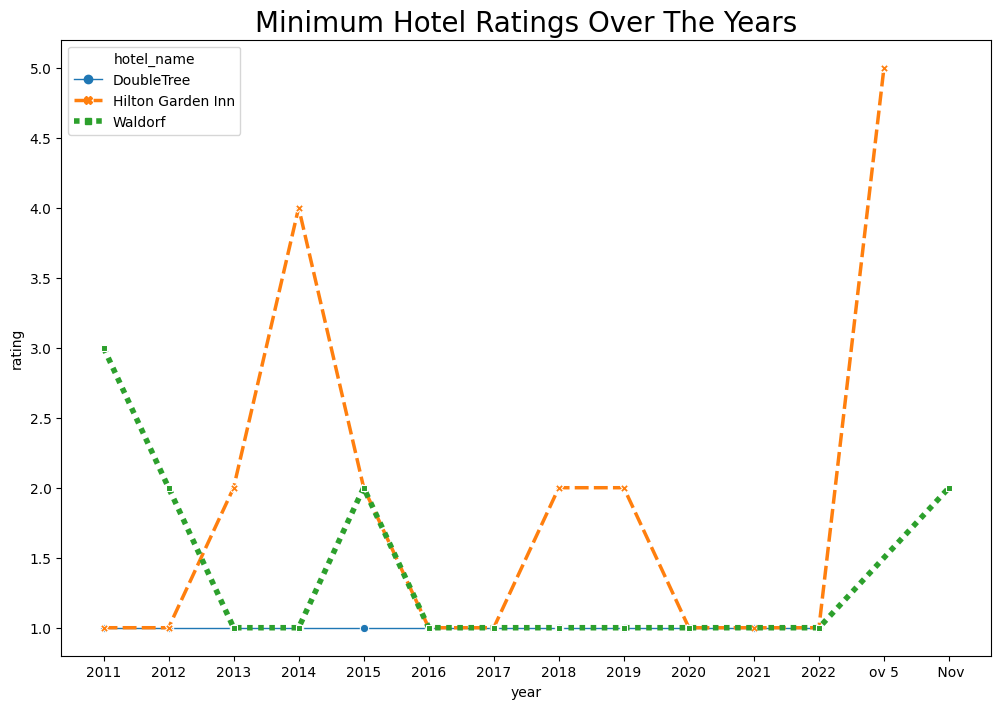

In [11]:
def min_rating_plot(df):
    fig, ax = plt.subplots(figsize=(12,8))
    ax = sns.lineplot(x = 'year', y = 'rating', hue = 'hotel_name', data = df, legend=True,
                 style = 'hotel_name', markers = True,size = 'hotel_name',sizes=(4, 1))
    ax.set_title('Minimum Hotel Ratings Over The Years',fontsize=20)   
    plt.savefig('Minimum_Hotel_Ratings_Over_The_Years.png')
min_rating_plot(data_rating_min)

When it comes to the minimum rating scores in different hotels, Double Tree has 1 over the years, whereas other hotels have regular fluctuation over the years, and we do not observe any relationship between the pandemic and the minimum hotel ratings.

## The fourth static plot: Share of Guest Number in different years (all hotels)

In [12]:
def get_guest_data(df):
    data_guest = df[['hotel_name','review_date']]
    year2 = []
    for index, content in data_guest.iterrows():
        lasttwo = content['review_date'][-2:]
        year2.append(lasttwo)

    data_guest['year'] = year2 
    
    return data_guest

def guestdata_plot(df):
    data_guest_new = df.groupby(['hotel_name','year'])['hotel_name'].count() # group by time as well 
    data_guest_new = data_guest_new.to_frame()
    data_guest_new.columns = ['guest_number']
    data_guest_new = data_guest_new.reset_index()
    data_guest_new = pd.DataFrame(data_guest_new,index=[8,9,10,11,27,28,29,30,40,41,42,43])
    return data_guest_new

In [13]:
data_guest = get_guest_data(data)
guest_data_new = guestdata_plot(data_guest)

/var/folders/6w/6xy2kbxd18qbdk45rsrvm8w40000gn/T/ipykernel_13779/2358646642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_guest['year'] = year2


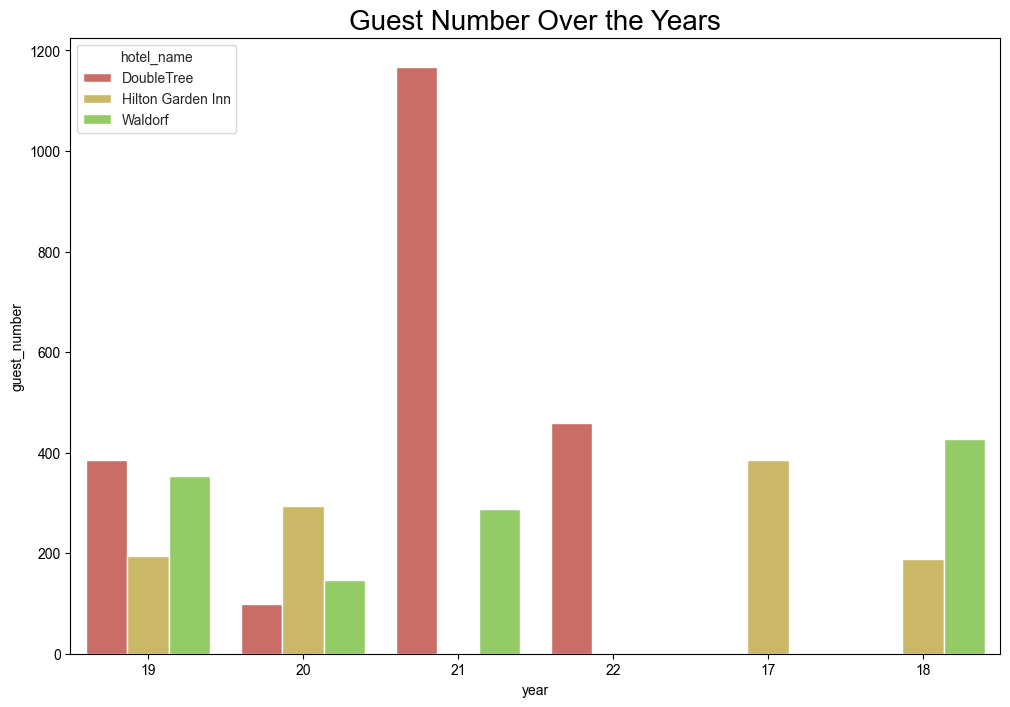

In [14]:
def pie_all(df):
    fig, ax = plt.subplots(figsize=(12,8))
    ax=sns.set_style ("whitegrid")
    ax = sns.barplot(x="year", y="guest_number", hue="hotel_name", data= df,
                palette=sns.color_palette("hls", 8))
    ax.set_title('Guest Number Over the Years',fontsize=20)
    plt.savefig('Share_of_Guest_Number_in_different_years_all.png')
    
pie_all(guest_data_new)

We can see that there is a weird perk in 2021 for DoubleTree, my best guess for here is there maybe some coupons were provided for second tier hotel in 2021 that is used for incentives.

## The fifth static plot: Share of Guest Number in different years (Hilton Garden Inn)

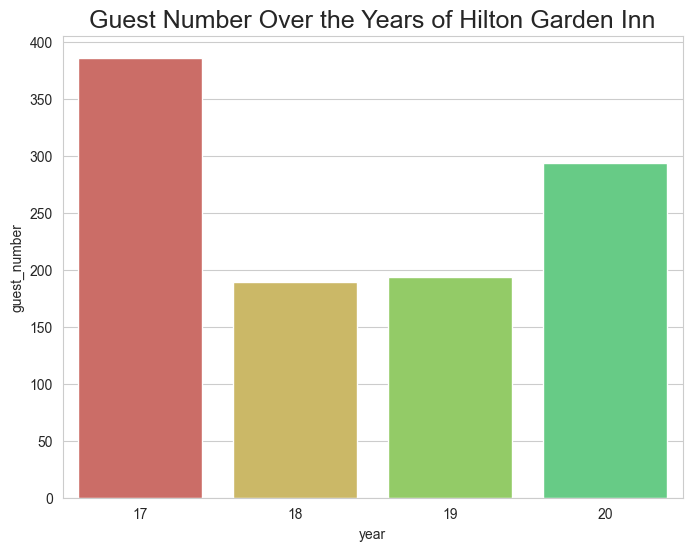

In [15]:
def pie_HG(df):
    fig, ax = plt.subplots(figsize=(8,6))
    ax=sns.set_style ("whitegrid")
    ax = sns.barplot(x="year", y="guest_number", data=df[df['hotel_name']=='Hilton Garden Inn'],
                palette=sns.color_palette("hls", 8))
    ax.set_title('Guest Number Over the Years of Hilton Garden Inn',fontsize=18)
    plt.savefig('Share_of_Guest_Number_in_different_years_Hilton_Garden_Inn.png')
    
pie_HG(guest_data_new)

## The sixth static plot: Share of Guest Number in different years (Double Tree)

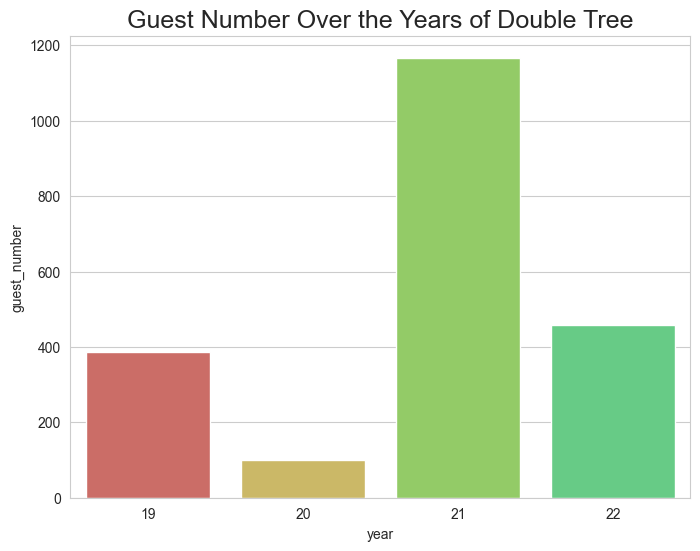

In [16]:
def pie_DT(df):
    fig, ax = plt.subplots(figsize=(8,6))
    ax=sns.set_style ("whitegrid")
    ax = sns.barplot(x="year", y="guest_number", data=df[df['hotel_name']=='DoubleTree'],
                    palette=sns.color_palette("hls", 8))
    ax.set_title('Guest Number Over the Years of Double Tree',fontsize=18)
    plt.savefig('Share_of_Guest_Number_in_different_years_Double_Tree.png')

pie_DT(guest_data_new)

## The seventh static plot: Share of Guest Number in different years (Waldorf)

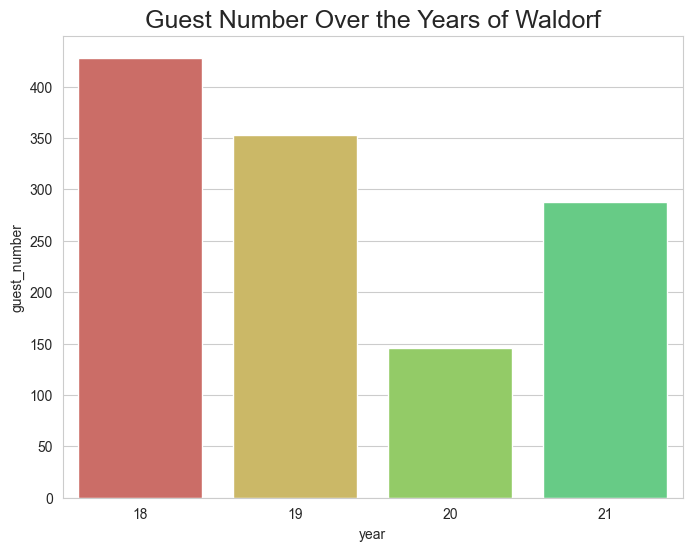

In [17]:
def pie_WD(df):
    fig, ax = plt.subplots(figsize=(8,6))
    ax=sns.set_style ("whitegrid")
    ax = sns.barplot(x="year", y="guest_number", data=df[df['hotel_name']=='Waldorf'],
                    palette=sns.color_palette("hls", 8))
    ax.set_title('Guest Number Over the Years of Waldorf',fontsize=18)
    plt.savefig('Share_of_Guest_Number_in_different_years_Waldorf.png')

pie_WD(guest_data_new)

## The eighth static plot: word cloud of all hotels


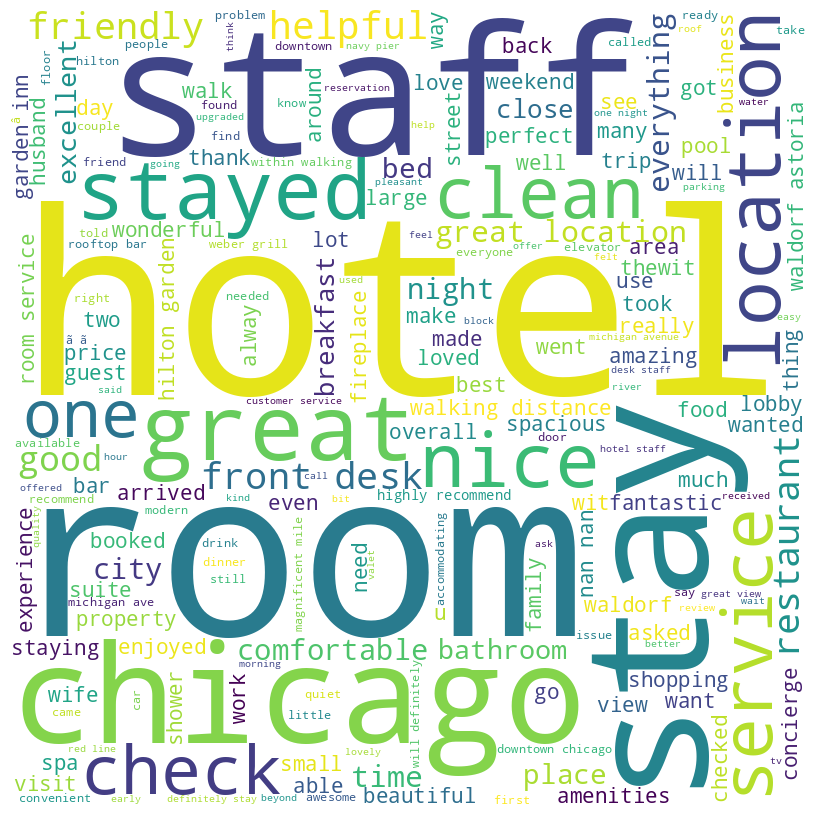

In [18]:
df = pd.read_csv(path, encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df['review_content']:
    
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud_all.png')

From the wordcloud, we can see that customers are interested in the room service and staff that they were served. And they are also interested in the locatioin of where they stayed.

## The ninth static plot: word cloud of Double Tree

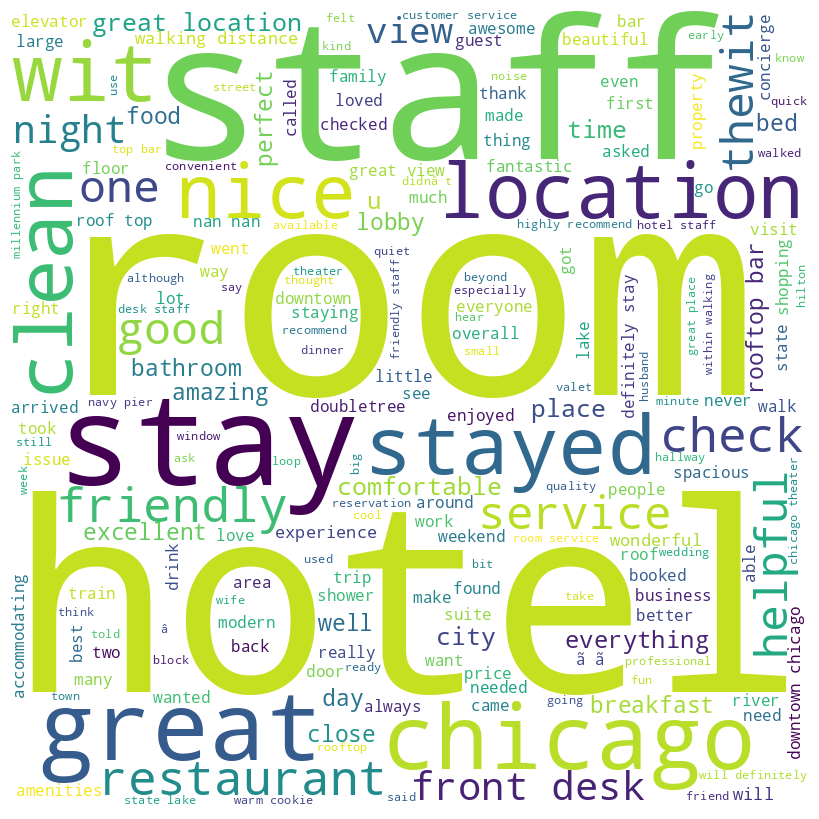

In [19]:
df = pd.read_csv(path, encoding ="latin-1")
df = df[df['hotel_name']=='DoubleTree']

comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df['review_content']:
    
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud_Double_Tree.png')

## The tenth static plot: word cloud of Hilton Garden Inn

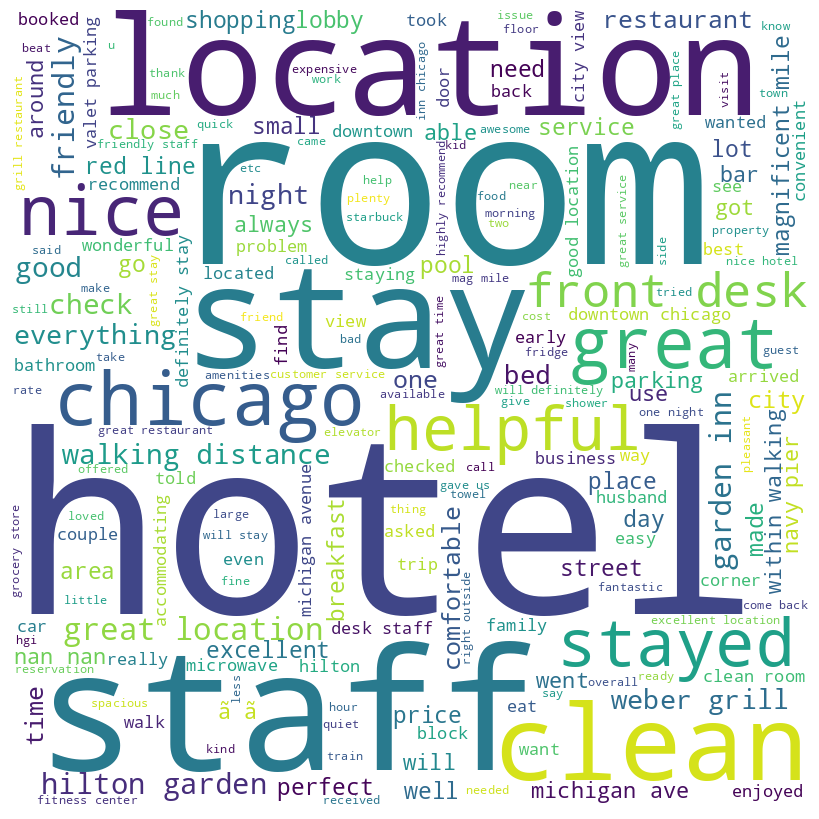

In [20]:
df = pd.read_csv(path, encoding ="latin-1")
df = df[df['hotel_name']=='Hilton Garden Inn']

comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df['review_content']:
    
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud_Hilton_Garden_Inn.png')

## The eleventh static plot: word cloud of Waldorf

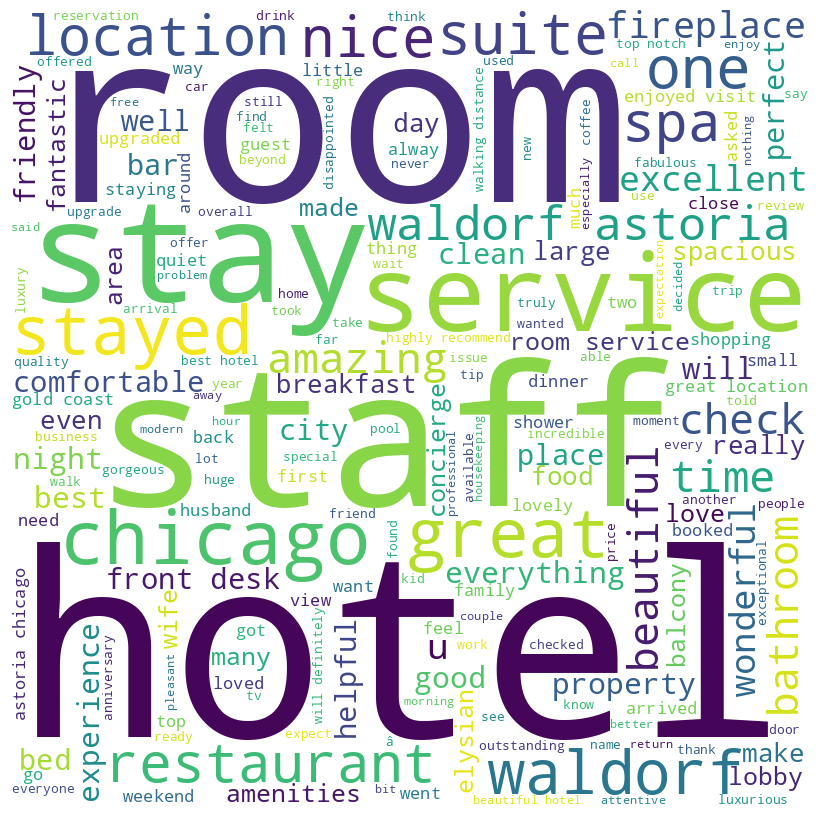

In [21]:
df = pd.read_csv(path, encoding ="latin-1")
df = df[df['hotel_name']=='Waldorf']

comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df['review_content']:
    
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud_Waldorf.png')

## The Sentiment Distribution Plotting

In [22]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

Let's plot the density of subjectivbity and polarity of the distribution

In [23]:
def get_sentiment(hotel):   
    polarity = []
    subjectivity = []
    a = data[data['hotel_name'] == hotel]
    for index, content in a.iterrows():
        if type(content['review_content']) == type('str'):
            text = content['review_content']
            doc = nlp(text)
            polarity.append(doc._.blob.polarity) # measures the sentiment of each client. 
            subjectivity.append(doc._.blob.subjectivity)  # measures the subjectivity of each client. 
        else:
            pass
    return [polarity,subjectivity]

def plot_polarity(hotel):
    ax = sns.displot(get_sentiment(hotel)[0], kde=True, bins=30)
    plt.title('Distribution of polarity from comments of {}'.format(hotel),fontsize=20)

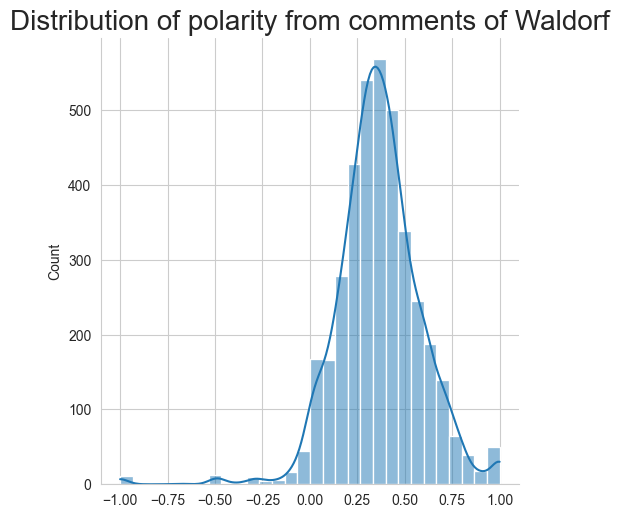

In [24]:
# For Tier one hotel
plot_polarity('Waldorf')

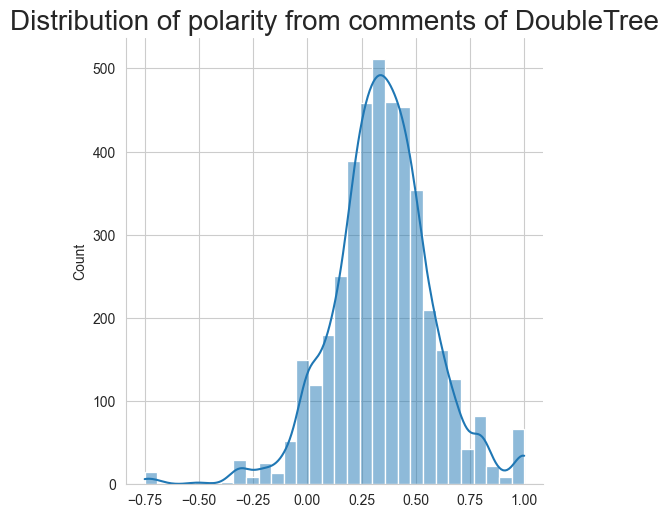

In [25]:
# For Tier two hotel
plot_polarity('DoubleTree')

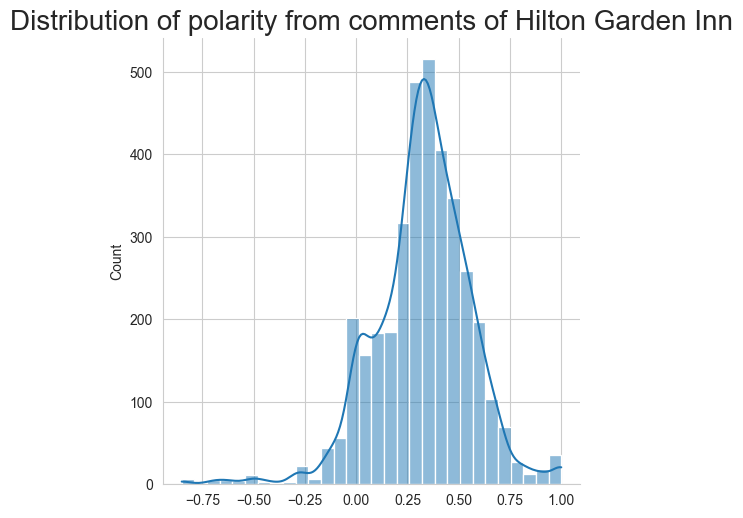

In [26]:
# For tier three hotel
plot_polarity('Hilton Garden Inn')

In [27]:
def plot_subjectivity(hotel):
    ax = sns.displot(get_sentiment(hotel)[1], kde=True, bins=30)
    plt.title('Distribution of subjectivity from comments of {}'.format(hotel),fontsize=20)

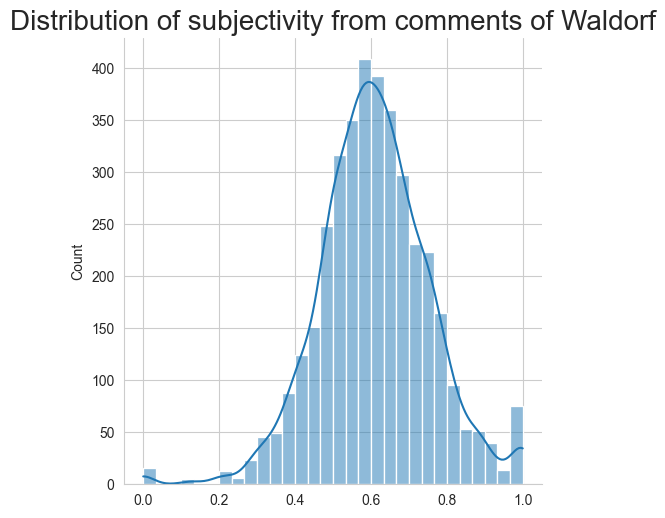

In [28]:
# For Tier one hotel
plot_subjectivity('Waldorf')

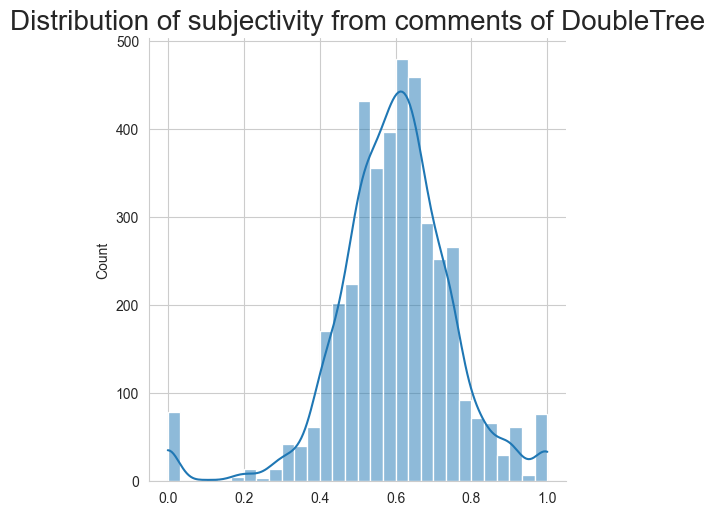

In [29]:
# For Tier two hotel
plot_subjectivity('DoubleTree')

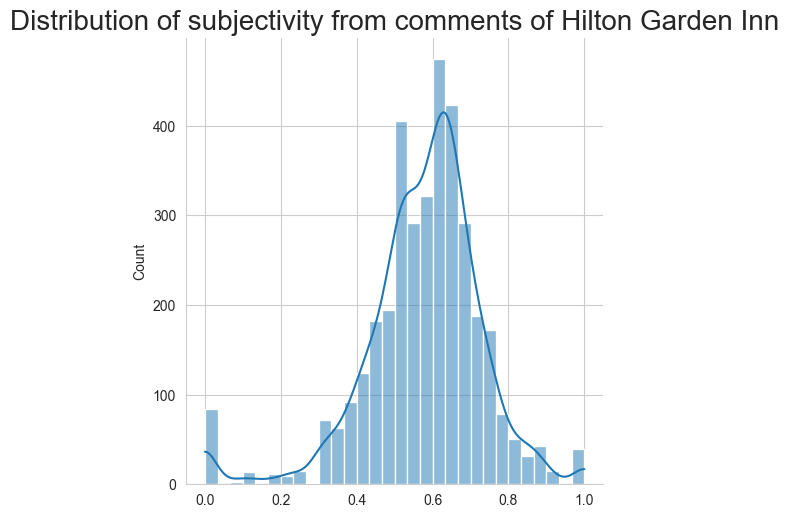

In [30]:
# For tier three hotel
plot_subjectivity('Hilton Garden Inn')

In terms of polarity, we find that the polarity of the three hotels all show normal distribution, with a mean located around 0.3. The distribution of sensitivity of Double Tree and Hilton Garden Inn are slightly left skewed and the Waldorf’s sentiment distribution is approaching normal distribution.

## Predict review sentiment based off the review text

Now that I have the subjectivity of the text, I can now build a model to explain and predict the usefulness of sentiment trend and how accurate is my model to predict this. I will start with 2 different approaches:
1. Using Machine Learning models using sklearn.
2. With deep nearal network using tensorflow.

But before that, let's do some basic text preprocessing to make sure that our data is clean and tidy. And at the end of the analysis, I will try to predict sentiment of our own review based on the rating.

In [31]:
import string
import numpy as np
import tensorflow as tf
import pickle
from wordcloud import WordCloud

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

## Text preprocessing

In [32]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

In [33]:
data['class'] = data['rating'].apply(rating)

In [34]:
data.head()

,Unnamed: 0,scrapping_date,reviewer_name,review_date,rating,review_title,review_content,date_of_stays,hotel_name,source_name,period,rating_rescale,class
0,0,2022-11-08 23:31:45.784547,Stephany C,5 Nov,2.0,Overrated,our room was not ready when we got there they ...,November 2022,Waldorf,Tripadvisor,pre-Covid,0.4,Bad
1,1,2022-11-08 23:31:45.823554,I love Pancake,Jul 2022,5.0,Beautiful property,Beautiful hotel and lovely amenities. The lobb...,July 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good
2,2,2022-11-08 23:31:45.838017,DrS,Oct 2022,5.0,Fabulous Hotel worth every penny! My new Chica...,Business trip and FABULOUS hotel--great staff ...,October 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good
3,3,2022-11-08 23:31:45.849812,LEVI S,Oct 2022,2.0,Very disappointed,This Waldorf Astoria really disappointed me. ...,October 2022,Waldorf,Tripadvisor,post-Covid,0.4,Bad
4,4,2022-11-08 23:31:45.862496,kev1438,Oct 2022,5.0,Still Outstandng,"I haven’t been here for many years, having sta...",October 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good


### Choose between stemming and lemmatization

In [35]:
print('Original:')
print(data['review_content'][0])
print()

sentence = []
for word in data['review_content'][0].split():
    stemmer = SnowballStemmer('english')
    sentence.append(stemmer.stem(word))
print('Stemming:')
print(' '.join(sentence))
print()

sentence = []
for word in data['review_content'][0].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))
print('Lemmatization:')
print(' '.join(sentence))

Original:
our room was not ready when we got there they we will give you other one it was stinky when we got there we found old containers of food on garbage dirty used robe no extra blankets for the junior suite dirty carpet over priced for a dirty room

Stemming:
our room was not readi when we got there they we will give you other one it was stinki when we got there we found old contain of food on garbag dirti use robe no extra blanket for the junior suit dirti carpet over price for a dirti room

Lemmatization:
our room be not ready when we get there they we will give you other one it be stinky when we get there we find old containers of food on garbage dirty use robe no extra blanket for the junior suite dirty carpet over price for a dirty room


Therefore, in this case I would like to use the lemmatization to get the base form of the word.

In [36]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()
    
    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]
    
    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

I find that some of the review content may end with float. So to serve the purpose of sentiment analysis for words, I decided to filter out those types that are not string.

In [37]:
data_cleaned = data[data['review_content'].apply(isinstance, args=(str,))]

In [38]:
data_cleaned.head()

,Unnamed: 0,scrapping_date,reviewer_name,review_date,rating,review_title,review_content,date_of_stays,hotel_name,source_name,period,rating_rescale,class
0,0,2022-11-08 23:31:45.784547,Stephany C,5 Nov,2.0,Overrated,our room was not ready when we got there they ...,November 2022,Waldorf,Tripadvisor,pre-Covid,0.4,Bad
1,1,2022-11-08 23:31:45.823554,I love Pancake,Jul 2022,5.0,Beautiful property,Beautiful hotel and lovely amenities. The lobb...,July 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good
2,2,2022-11-08 23:31:45.838017,DrS,Oct 2022,5.0,Fabulous Hotel worth every penny! My new Chica...,Business trip and FABULOUS hotel--great staff ...,October 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good
3,3,2022-11-08 23:31:45.849812,LEVI S,Oct 2022,2.0,Very disappointed,This Waldorf Astoria really disappointed me. ...,October 2022,Waldorf,Tripadvisor,post-Covid,0.4,Bad
4,4,2022-11-08 23:31:45.862496,kev1438,Oct 2022,5.0,Still Outstandng,"I haven’t been here for many years, having sta...",October 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good


In [39]:
data_cleaned['Review'] = data_cleaned['review_content'].apply(cleaning)

/var/folders/6w/6xy2kbxd18qbdk45rsrvm8w40000gn/T/ipykernel_13779/1562477925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Review'] = data_cleaned['review_content'].apply(cleaning)


In [40]:
data_cleaned.head()

,Unnamed: 0,scrapping_date,reviewer_name,review_date,rating,review_title,review_content,date_of_stays,hotel_name,source_name,period,rating_rescale,class,Review
0,0,2022-11-08 23:31:45.784547,Stephany C,5 Nov,2.0,Overrated,our room was not ready when we got there they ...,November 2022,Waldorf,Tripadvisor,pre-Covid,0.4,Bad,room ready get give one stinky get find old co...
1,1,2022-11-08 23:31:45.823554,I love Pancake,Jul 2022,5.0,Beautiful property,Beautiful hotel and lovely amenities. The lobb...,July 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good,beautiful hotel lovely amenities lobby small d...
2,2,2022-11-08 23:31:45.838017,DrS,Oct 2022,5.0,Fabulous Hotel worth every penny! My new Chica...,Business trip and FABULOUS hotel--great staff ...,October 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good,business trip fabulous hotelgreat staff wonder...
3,3,2022-11-08 23:31:45.849812,LEVI S,Oct 2022,2.0,Very disappointed,This Waldorf Astoria really disappointed me. ...,October 2022,Waldorf,Tripadvisor,post-Covid,0.4,Bad,waldorf astoria really disappoint visit waldor...
4,4,2022-11-08 23:31:45.862496,kev1438,Oct 2022,5.0,Still Outstandng,"I haven’t been here for many years, having sta...",October 2022,Waldorf,Tripadvisor,post-Covid,1.0,Good,haven’t many years stay instead defunct conrad...


In [41]:
data_cleaned = data_cleaned[['class','Review']]

### Train Split datasets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_cleaned['Review'],
                                                     data_cleaned['class'], test_size=0.2)

## SKLearn model to predict

Now let's build our first type of model within the sklearn models to fit in the words from the review and predict the usefulness and precision of the model for sklearn.

In [43]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

In [44]:
pickle.dump(tfid, open('tfidf.pkl', 'wb'))

In [45]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

In [46]:
accuracy = []

for model in models:
    cross_val = cross_val_score(model, train_tfid_matrix, y_train, scoring='accuracy',
                               cv=StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

In [47]:
models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB']

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
acc

,Model,Accuracy
0,DecisionTreeClassifier,0.925227
1,RandomForestClassifier,0.947306
2,SVC,0.943145
3,LogisticRegression,0.929279
4,KNeighborsClassifier,0.914133
5,BernoulliNB,0.890453


Since that RandomForestClassifier Classifier perform better than other models, we will use it to train our model.

In [48]:
log = RandomForestClassifier()
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

In [49]:
pickle.dump(log, open('ml_model.pkl', 'wb'))

In [50]:
ml = pickle.load(open('ml_model.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]
    
    return pred, pred_proba[0][idx]

In [51]:
ml_predict('poor room service')

('Good', 0.65)

In [52]:
ml_predict('Such a comfy place to stay with the loved one')

('Good', 0.99)

In [53]:
ml_predict('Hard to get here but the scenery is wonderful')

('Good', 0.96)

In [54]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  88   44    0]
 [   0 2034    0]
 [   1   81   96]]
              precision    recall  f1-score   support

         Bad       0.99      0.67      0.80       132
        Good       0.94      1.00      0.97      2034
     Neutral       1.00      0.54      0.70       178

    accuracy                           0.95      2344
   macro avg       0.98      0.74      0.82      2344
weighted avg       0.95      0.95      0.94      2344



This model doesn't looks nice. I guess this is because the overfitting problem and the small dataset and the rating class "good" is too much in here. Let's turn to undersample and balanced dataset again.

### balance dataset

In [55]:
# class count
class_count_g, class_count_n, class_count_b = data_cleaned['class'].value_counts()
# Separate class
class_b = data_cleaned[data_cleaned['class'] == 'Bad']
class_n = data_cleaned[data_cleaned['class'] == 'Neutral']
class_g = data_cleaned[data_cleaned['class'] == 'Good']

# print the shape of the class
print('class bad:', class_b.shape)
print('class neutral:', class_n.shape)
print('class good:', class_g.shape)

class bad: (678, 2)
class neutral: (860, 2)
class good: (10181, 2)


This model doesn't looks nice when comes to the two subjectivity, but it doesn't perform that well when comes to neutral sentiment. I guess this is because the overfitting problem and the small dataset that beacuse I undersample rating "good" in here, it makes the dataset small. Let's turn to deep learning to have a try.

total class of good and neutral and bad: Good       860
Neutral    860
Bad        678
Name: class, dtype: int64


<AxesSubplot: title={'center': 'count (target)'}>

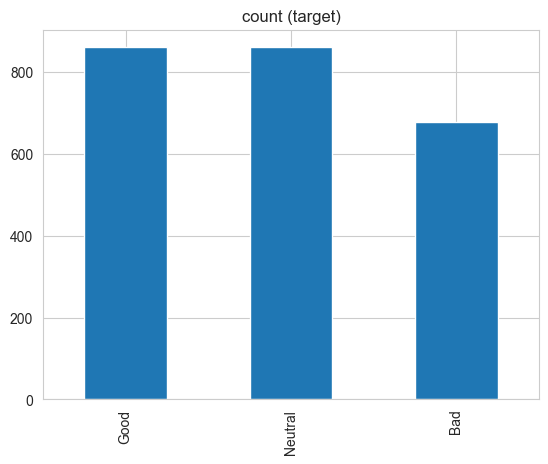

In [56]:
#balance dataset
class_g_under = class_g.sample(class_count_n)

data_under = pd.concat([class_g_under, class_n, class_b], axis=0)

print("total class of good and neutral and bad:",data_under['class'].value_counts())# plot the count after under-sampeling
data_under['class'].value_counts().plot(kind='bar', title='count (target)')

In [57]:
data_under.head()

,class,Review
9387,Good,hotel great location diagonally across street ...
1927,Good,beautiful luxury hotel downtown chicago luxury...
10909,Good,ok hotel best location best price available ma...
8881,Good,stay hotel 83021 one night arrive 800pm check ...
11874,Good,clean friendly staff perfect location


In [58]:
X_train, X_test, y_train, y_test = train_test_split(data_under['Review'],
                                                     data_under['class'], test_size=0.2)

In [59]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

pickle.dump(tfid, open('tfidf.pkl', 'wb'))

models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

accuracy = []

for model in models:
    cross_val = cross_val_score(model, train_tfid_matrix, y_train, scoring='accuracy',
                               cv=StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB']

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
acc

,Model,Accuracy
0,DecisionTreeClassifier,0.744001
1,RandomForestClassifier,0.806065
2,SVC,0.824307
3,LogisticRegression,0.810245
4,KNeighborsClassifier,0.659528
5,BernoulliNB,0.773230


It lookslike SVC classifier has the highest accuracy here.

In [60]:
log = SVC(probability = True)
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

pickle.dump(log, open('ml_model.pkl', 'wb'))

ml = pickle.load(open('ml_model.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]
    
    return pred, pred_proba[0][idx]

In [61]:
ml_predict('poor room service')

('Bad', 0.9559782584067578)

In [62]:
ml_predict('Such a comfy place to stay with the loved one')

('Good', 0.9765001179310959)

In [63]:
ml_predict('Hard to get here but the scenery is wonderful')

('Good', 0.5676319235335693)

In [64]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[102   5  23]
 [  0 160  12]
 [  9  21 148]]
              precision    recall  f1-score   support

         Bad       0.92      0.78      0.85       130
        Good       0.86      0.93      0.89       172
     Neutral       0.81      0.83      0.82       178

    accuracy                           0.85       480
   macro avg       0.86      0.85      0.85       480
weighted avg       0.86      0.85      0.85       480



Now it looks much better with the current performance comes to good and bad. But it still doesn't looks good when comes to neutral sentiment. My best guess for here is the limited dataset because I undersample the good class to balance dataset and therefore comes to a limited dataset. But how is the neural network model performs when it comes to building the model?

## Building DNN Model with Tensorflow

In [65]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
# print(tokenizer.word_index)
total_word = len(tokenizer.word_index)+1
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

# One hot encoding the label
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

Total distinct words: 6125


In [66]:
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))
pickle.dump(lb, open('label.pkl', 'wb'))

In [67]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

2022-12-13 00:11:39.097074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           49000     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               3200      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                        

In [68]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

Epoch 1/25
60/60 [==============================] - 10s 97ms/step - loss: 1.1132 - accuracy: 0.3498 - val_loss: 1.1128 - val_accuracy: 0.3583
Epoch 2/25
60/60 [==============================] - 5s 80ms/step - loss: 1.1124 - accuracy: 0.3624 - val_loss: 1.1117 - val_accuracy: 0.3583
Epoch 3/25
60/60 [==============================] - 5s 81ms/step - loss: 1.1114 - accuracy: 0.3566 - val_loss: 1.1108 - val_accuracy: 0.3583
Epoch 4/25
60/60 [==============================] - 5s 82ms/step - loss: 1.1104 - accuracy: 0.3723 - val_loss: 1.1098 - val_accuracy: 0.3583
Epoch 5/25
60/60 [==============================] - 5s 77ms/step - loss: 1.1097 - accuracy: 0.3697 - val_loss: 1.1089 - val_accuracy: 0.3583
Epoch 6/25
60/60 [==============================] - 5s 78ms/step - loss: 1.1094 - accuracy: 0.3488 - val_loss: 1.1080 - val_accuracy: 0.3583
Epoch 7/25
60/60 [==============================] - 5s 81ms/step - loss: 1.1082 - accuracy: 0.3639 - val_loss: 1.1071 - val_accuracy: 0.3583
Epoch 8/25
6

<AxesSubplot: >

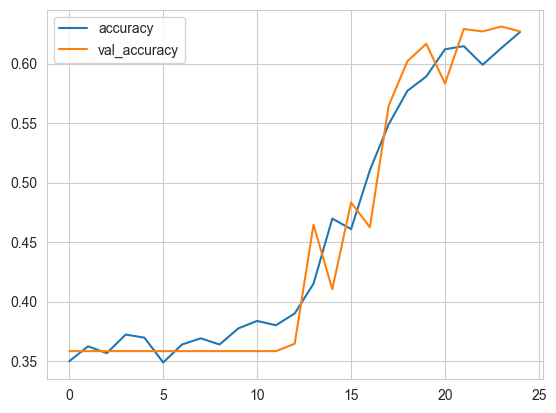

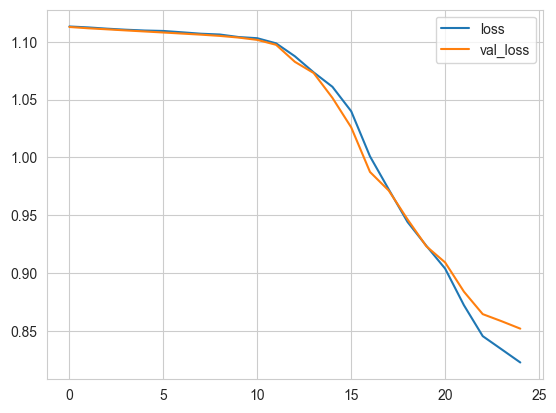

In [69]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

In [70]:
pred2 = model.predict(test_padded)

true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)

print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

15/15 [==============================] - 1s 12ms/step
[[  0  17 113]
 [  0 160  12]
 [  0  37 141]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.75      0.93      0.83       172
           2       0.53      0.79      0.64       178

    accuracy                           0.63       480
   macro avg       0.43      0.57      0.49       480
weighted avg       0.46      0.63      0.53       480



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prediction

In [71]:
#SVC Model Prediction
log = SVC(probability = True)
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

pickle.dump(log, open('ml_model.pkl', 'wb'))

ml = pickle.load(open('ml_model.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]
    
    return pred


# Deep Neural Network Prediction
def dl_predict(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)

    pred = model.predict(padded)
    # Get the label name back
    result = lb.inverse_transform(pred)[0]
    
    return result

In [72]:
text = 'Such a comfy place to stay with the loved one'
print('Prediction using Logistic Regression: {}'.format(ml_predict(text)))
print('Prediction using DNN: {}'.format(dl_predict(text)))

Prediction using Logistic Regression: Good
1/1 [==============================] - 1s 735ms/step
Prediction using DNN: Good


In [73]:
text = 'Awful room services and slow wifi connection'
print('Prediction using Logistic Regression: {}'.format(ml_predict(text)))
print('Prediction using DNN: {}'.format(dl_predict(text)))

Prediction using Logistic Regression: Bad
1/1 [==============================] - 0s 21ms/step
Prediction using DNN: Neutral


In [74]:
text = 'Hard to get here but the scenery is wonderful'
print('Prediction using Logistic Regression: {}'.format(ml_predict(text)))
print('Prediction using DNN: {}'.format(dl_predict(text)))

Prediction using Logistic Regression: Good
1/1 [==============================] - 0s 24ms/step
Prediction using DNN: Neutral


## Conclusion and next step

We can see that from the  prediction result that classic sklearn model, i.e.SVC classification model does well in the two subjectivity part, i.e.Good and Bad polars, but it doesn't do well in the neutral classifier detection.

On the other hand, DNN model does well in th classifier to the good side, i.e. the detection in Good and neutral, but it doesn't do well in the bad detection. 

My best guess for the underperformance is because of the imbalanced dataset for too much Good classifier and because I put the imbalanced dataset into nearly the same within the three different classifier, it made the whole dataset limited. Therefore to improve the performance of the model, I would choose a more accurate way to balance the dataset. 

Also since that I'm retrieving data from both the expedia.com and also tripadvisor.com for Waldorf, so the rating for Good is more likely. Therefore if we have more time, I would turn to make more rounded way to balance the dataset in a more scientific way.